# Phân tích trend mua sắm theo từng Vùng (Region). Khám phá đặc trưng mua sắm của các Vùng.

Kiểu vùng nào bán chạy nhất (sắp xếp), vùng nào lợi nhuận/doanh thu/unit cao nhất (sắp xếp ra). Mặt hàng ưa thích tại các vùng và trên toàn quốc...

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataflow import df_train, df_test, df_geography, df_product
import matplotlib.pyplot as plt

In [3]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [ ]:
df.info()
df.head()
# COGS: Cost of Goods Sold là vốn chi phí để sản xuất ra sản phẩm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


## 1. Tổng hợp và sắp xếp doanh thu, số lượng sản phẩm bán ra, vốn bỏ ra, lợi nhuận theo từng vùng

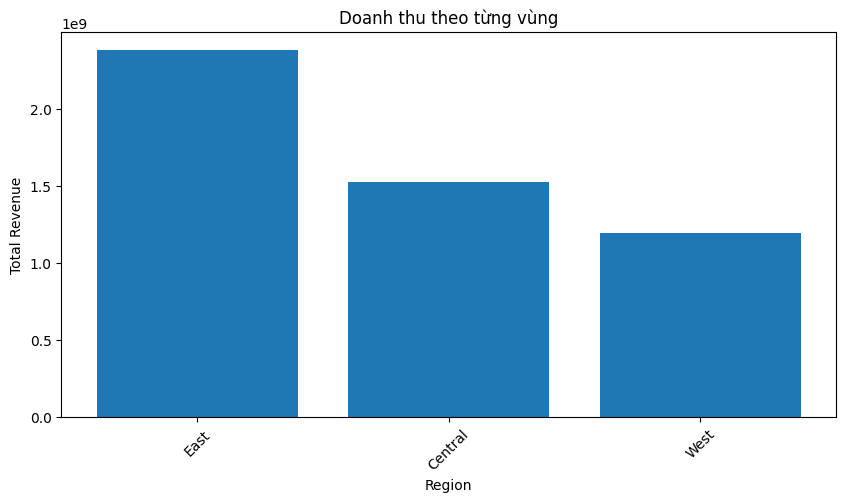

In [14]:
# Tổng hợp doanh thu theo vùng (Region)
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_revenue.index, region_revenue.values)
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo từng vùng")
plt.xticks(rotation=45)
plt.show()

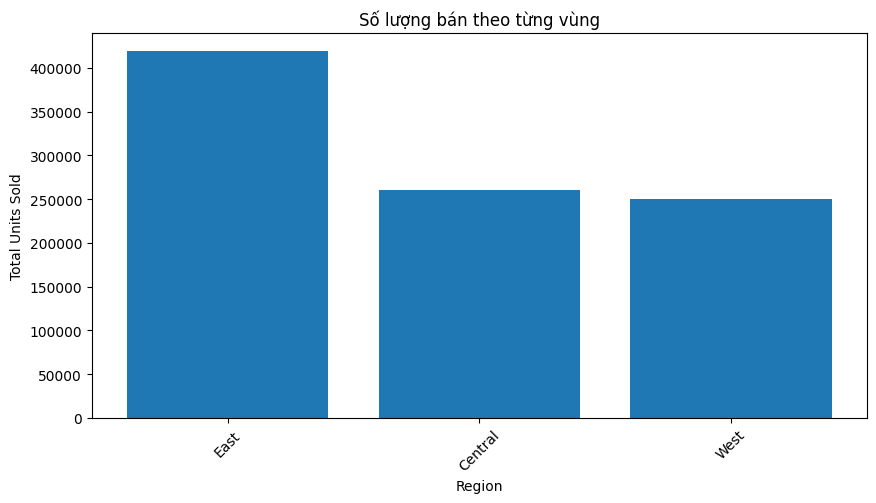

In [12]:
# Tổng hợp số lượng bán theo vùng
region_units = df.groupby("Region")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_units.index, region_units.values)
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo từng vùng")
plt.xticks(rotation=45)
plt.show()

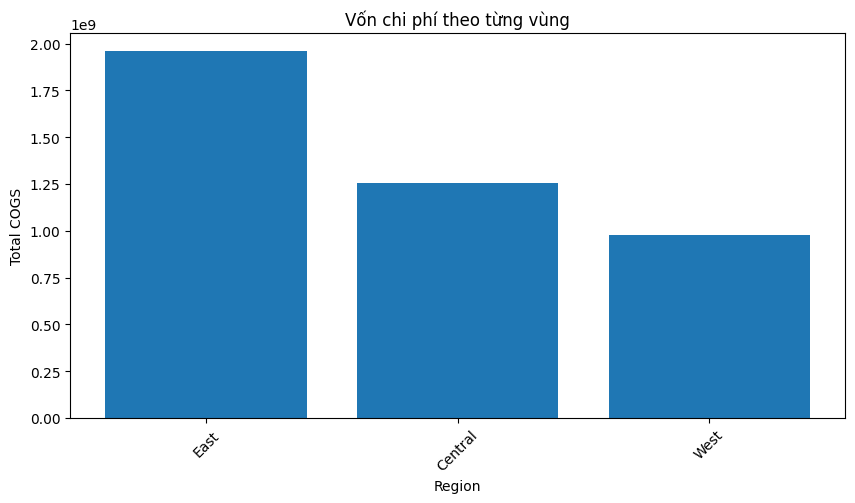

In [15]:
# Tổng hợp vốn chi phí theo vùng
region_cogs = df.groupby("Region")["COGS"].sum().sort_values(ascending=False)

# Vẽ biểu đồ vốn chi phí theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_cogs.index, region_cogs.values)
plt.xlabel("Region")
plt.ylabel("Total COGS")
plt.title("Vốn chi phí theo từng vùng")
plt.xticks(rotation=45)
plt.show()

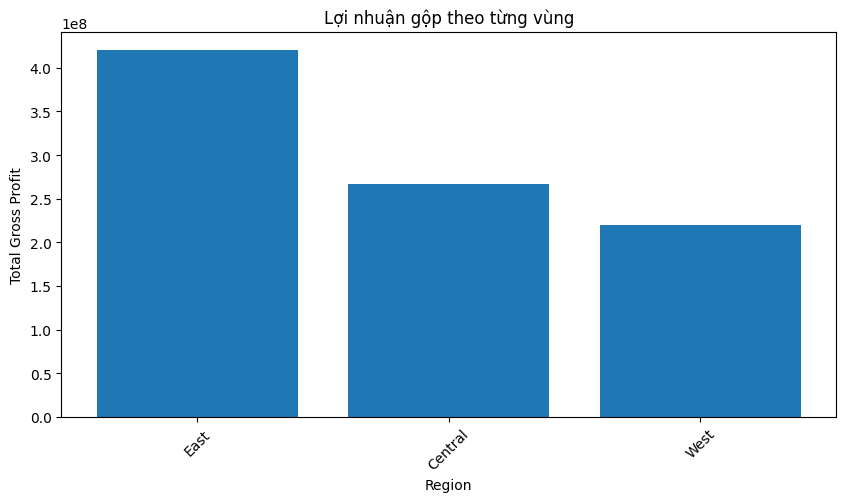

In [18]:
# Tính toán lợi nhuận gộp (Gross Profit)
df["Gross_Profit"] = df["Revenue"] - df["COGS"]

# Tổng hợp lợi nhuận theo vùng (Region)
region_profit = df.groupby("Region")["Gross_Profit"].sum().sort_values(ascending=False)

# Vẽ biểu đồ lợi nhuận theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_profit.index, region_profit.values)
plt.xlabel("Region")
plt.ylabel("Total Gross Profit")
plt.title("Lợi nhuận gộp theo từng vùng")
plt.xticks(rotation=45)
plt.show()


## 2. Xu hướng doanh thu theo thời gian trong từng vùng

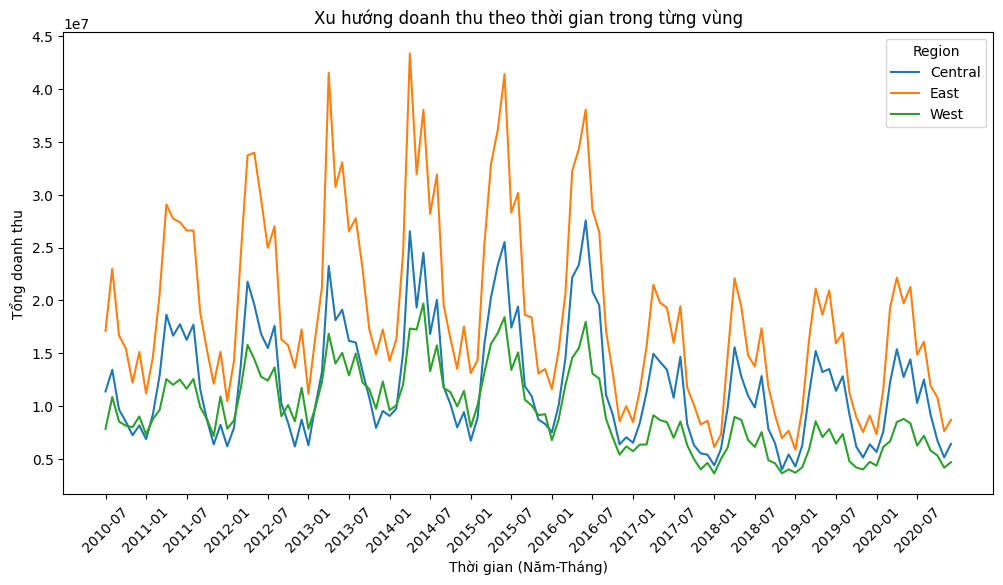

In [20]:
import matplotlib.pyplot as plt

# Tổng hợp doanh thu theo tháng và vùng
df["YearMonth"] = df["Date"].dt.to_period("M")
region_monthly_revenue = df.groupby(["YearMonth", "Region"])["Revenue"].sum().unstack()

# Chuyển Period thành string để vẽ biểu đồ đúng
region_monthly_revenue.index = region_monthly_revenue.index.astype(str)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for region in region_monthly_revenue.columns:
    plt.plot(region_monthly_revenue.index, region_monthly_revenue[region], label=region)

plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Tổng doanh thu")
plt.title("Xu hướng doanh thu theo thời gian trong từng vùng")
plt.xticks(rotation=45)

# Hiển thị mỗi 6 tháng để tránh quá tải nhãn trên trục x
plt.xticks(ticks=range(0, len(region_monthly_revenue.index), 6),
           labels=region_monthly_revenue.index[::6])

plt.legend(title="Region")
plt.show()

## 3. Phân tích theo Segment và Category theo số lượng sản phẩm bán ra

### Category (danh mục sản phẩm): Chia sản phẩm theo đặc điểm sử dụng hoặc đối tượng khách hàng mục tiêu.
- `Urban`: Sản phẩm dành cho môi trường đô thị.
- `Rural`: Sản phẩm phục vụ vùng nông thôn.
- `Youth`: Dòng sản phẩm dành riêng cho khách hàng trẻ tuổi (thanh thiếu niên, sinh viên, hoặc giới trẻ năng động).
- `Mix`: Dòng sản phẩm không thuộc một danh mục cụ thể nào mà có thể là sự kết hợp của nhiều nhóm khác nhau.

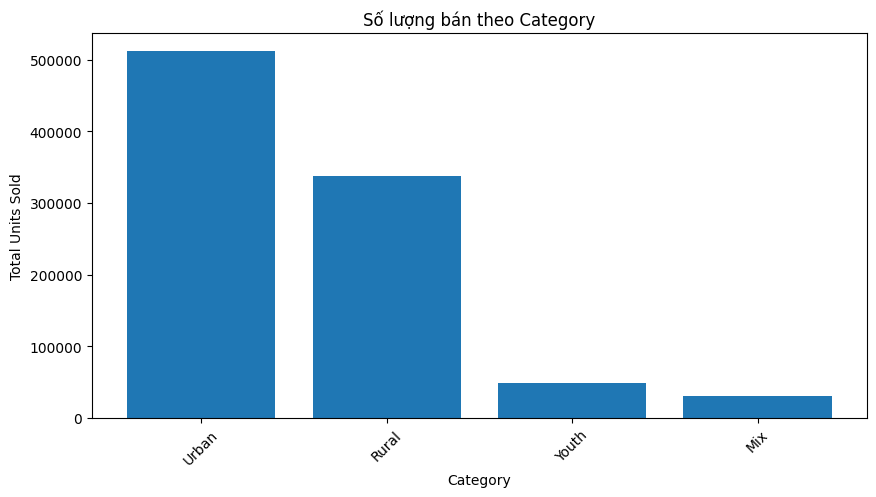

In [ ]:
# Tổng hợp số lượng bán theo Category
category_sales = df.groupby("Category")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo Category
plt.figure(figsize=(10, 5))
plt.bar(category_sales.index, category_sales.values)
plt.xlabel("Category")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo Category")
plt.xticks(rotation=45)
plt.show()

### Đánh giá biểu đồ trên:
- Tập trung nguồn lực vào dòng sản phẩm Urban và Rural, vì đây là thị trường lớn nhất.
- Đánh giá lại dòng sản phẩm Youth và Mix, có thể cần cải thiện chiến lược tiếp thị hoặc thay đổi dòng sản phẩm. Đặc biệt dòng sản phẩm Mix có đối tượng sử dụng sản phẩm rất hạn chế.
- Nghiên cứu thêm về loại sản phẩm cụ thể trong từng Category để tối ưu chiến lược nhập hàng.

### Segment (Phân khúc sản phẩm): Chia sản phẩm theo nhu cầu hoặc giá trị sử dụng
- `Convenience`: Sản phẩm phổ thông, tiện lợi
- `Productivity`: Sản phẩm giúp người dùng tăng hiệu suất làm việc (có thể là công nghệ, thời trang công sở, v.v.).
- `Select`: Có thể là dòng cao cấp, mang tính thời trang hoặc đặc biệt.
- `Moderation`: Sản phẩm cân bằng giữa tiện ích, giá cả và chất lượng, phù hợp với khách hàng phổ thông.
- `Extreme`: Dòng sản phẩm chuyên biệt, có thể là sản phẩm thể thao, leo núi, hoặc các mặt hàng bền bỉ, cao cấp hơn.
- `Youth`: Sản phẩm hướng đến giới trẻ, thường có thiết kế thời trang, phong cách năng động.
- `Select`:	Dòng sản phẩm cao cấp, thiết kế tinh tế, giá thành cao hơn.
- `All Season`:	Sản phẩm có thể sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- `Regular`:	Dòng sản phẩm tiêu chuẩn, không thuộc nhóm đặc biệt nào, có thể là các mặt hàng cơ bản.

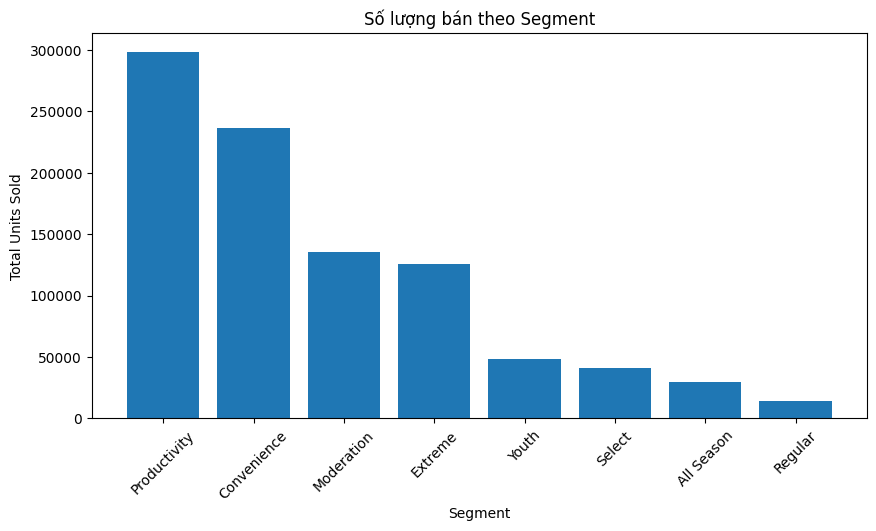

In [41]:
# Tổng hợp số lượng bán theo Segment
segment_sales = df.groupby("Segment")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo Segment
plt.figure(figsize=(10, 5))
plt.bar(segment_sales.index, segment_sales.values)
plt.xlabel("Segment")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo Segment")
plt.xticks(rotation=45)
plt.show()

### Đánh giá:
- Segment Productivity và Convenience có số lượng bán cao nhất, do nhu cầu xử dụng của các dòng sản phẩm này cao, đối tượng sử dụng đa dạng. Do đó công ty nên tập trung nhiều hơn vào các phân khúc này, mở rộng danh mục sản phẩm.
- Moderate và Extreme có doanh số trung bình. Xem xét mở rộng hoặc tinh chỉnh sản phẩm trong Moderation & Extreme để tối ưu doanh thu.
- Youth, Select, All Season, Regular có doanh số thấp. Có thể cần thay đổi chiến lược tiếp thị hoặc cải tiến sản phẩm.

### Nhóm theo Segment và Category

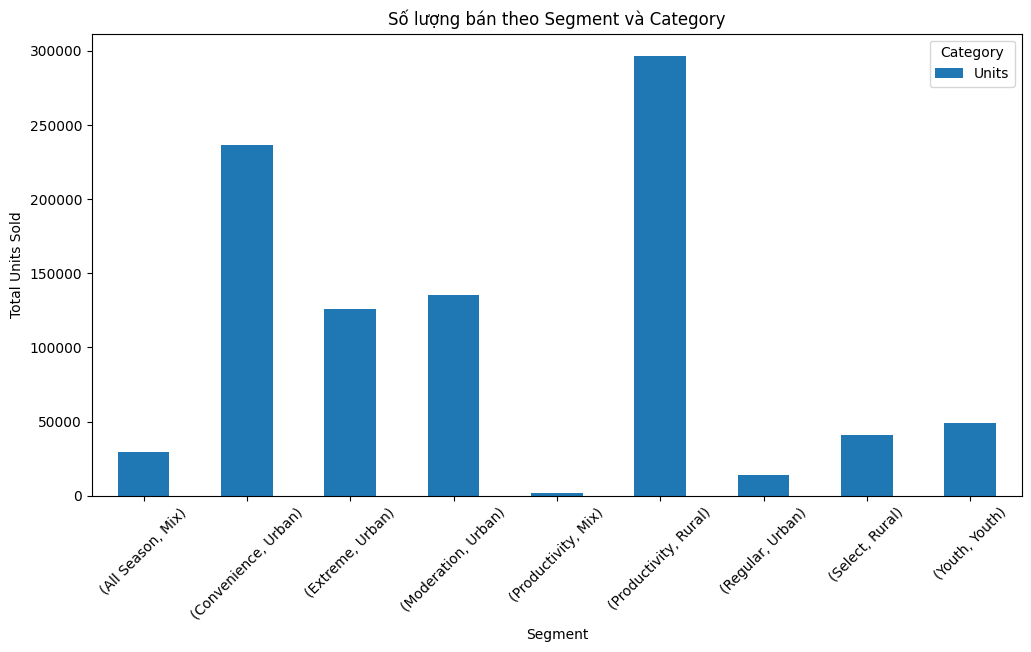

In [45]:
# Tổng hợp số lượng bán theo Segment và Category
segment_category_sales = df.groupby(["Segment", "Category"])["Units"].sum()#.unstack()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
segment_category_sales.plot(kind="bar", stacked=True)
plt.xlabel("Segment")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo Segment và Category")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

### Đánh giá:
- Urban có nhiều phân khúc bán chạy (Convenience, Extreme, Moderation).
- Rural chủ yếu tập trung vào Productivity. Có thể khách hàng ở khu vực này thích các sản phẩm có tính thực dụng cao.
- Youth và Select có doanh số thấp hơn. Nhóm khách hàng này có thể chưa được tiếp cận hiệu quả.
- Regular, All Season, Select có doanh số thấp nhất. Điều này có thể do sản phẩm chưa phù hợp với thị trường hoặc cần nhiều chiến lược quảng bá hơn.

## 4. Phân tích theo Segment và Category theo doanh thu

### Category

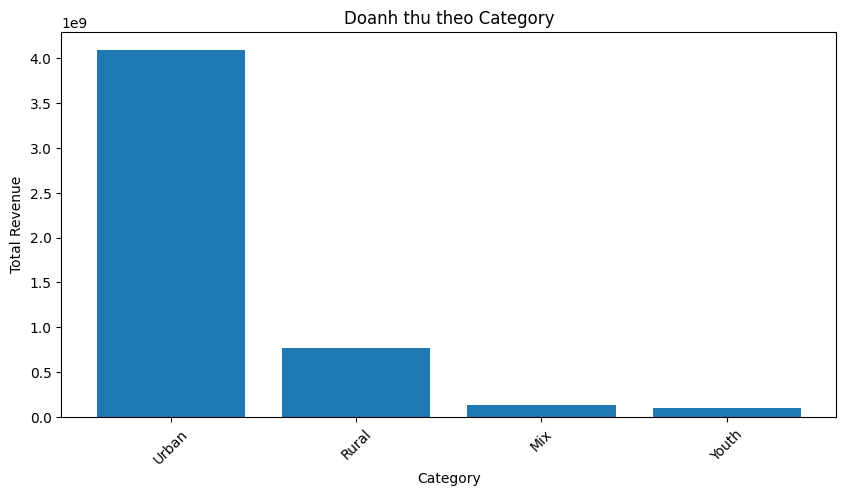

In [43]:
# Tổng hợp doanh thu bán theo Category
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
# Vẽ biểu đồ số lượng bán theo Category
plt.figure(figsize=(10, 5))
plt.bar(category_revenue.index, category_revenue.values)
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo Category")
plt.xticks(rotation=45)
plt.show()

### Segment

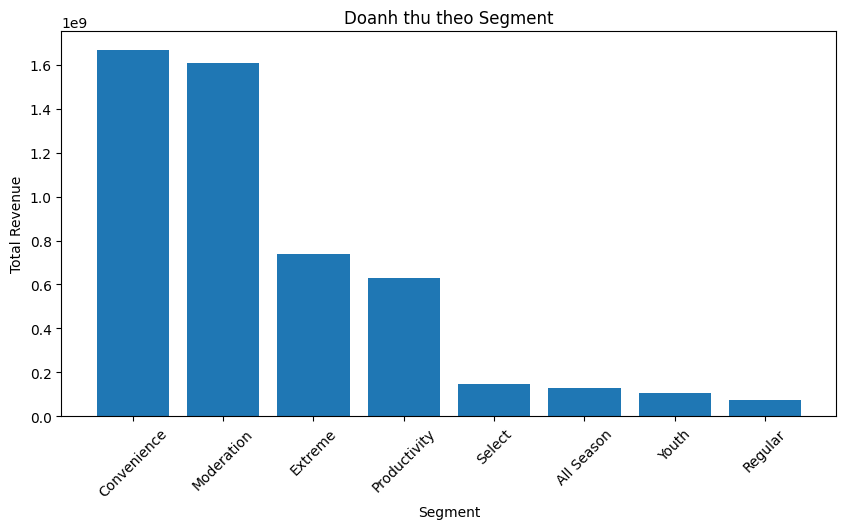

In [44]:
# Tổng hợp doanh thu theo Segment
segment_revenue = df.groupby("Segment")["Revenue"].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo Segment
plt.figure(figsize=(10, 5))
plt.bar(segment_revenue.index, segment_revenue.values)
plt.xlabel("Segment")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo Segment")
plt.xticks(rotation=45)
plt.show()

### Segment và Category

## 5. Top các sản phẩm bán chạy nhất theo từng vùng

### Top 10 sản phẩm bán chạy nhất của cả 3 vùng

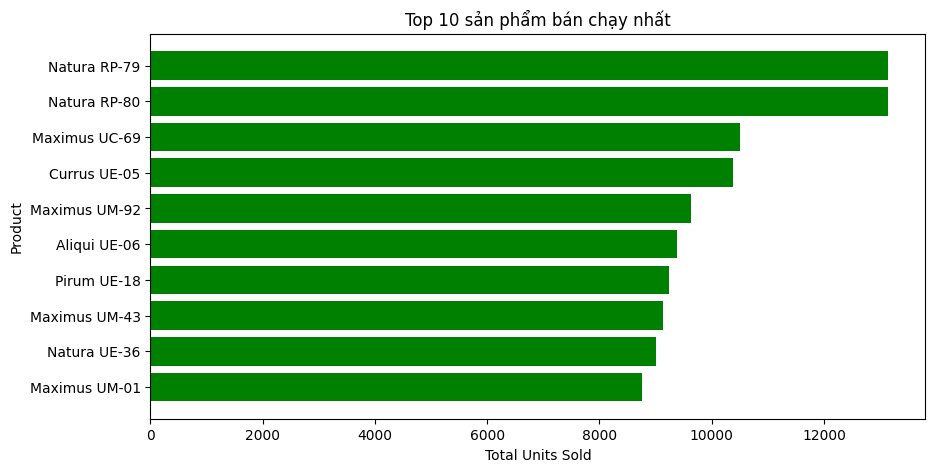

In [27]:
# Tổng hợp số lượng bán theo Product
product_sales = df.groupby("Product")["Units"].sum().sort_values(ascending=False).head(10)  # Top 10 sản phẩm bán chạy nhất

# Vẽ biểu đồ Top 10 sản phẩm bán chạy nhất
plt.figure(figsize=(10, 5))
plt.barh(product_sales.index, product_sales.values, color='green')
plt.xlabel("Total Units Sold")
plt.ylabel("Product")
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.gca().invert_yaxis()  # Đảo ngược trục để sản phẩm bán chạy nhất lên trên
plt.show()

### Top 10 sản phẩm bán chạy nhất theo mỗi vùng

C:\Users\Admin\AppData\Local\Temp\ipykernel_14828\627424413.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_region = region_product_sales.groupby("Region").apply(lambda x: x.nlargest(10, "Units")).reset_index(drop=True)


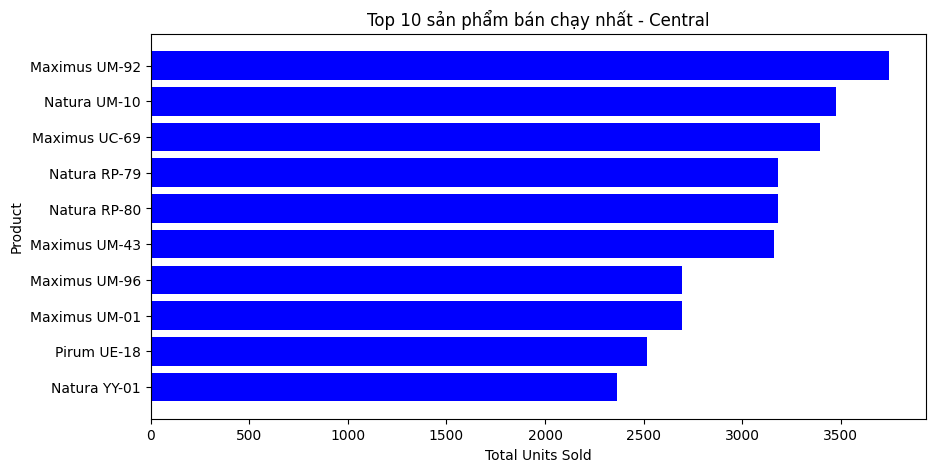

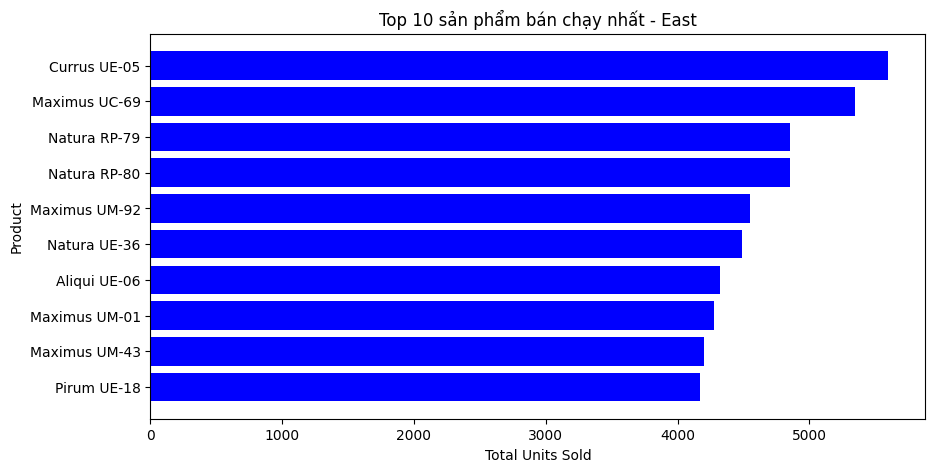

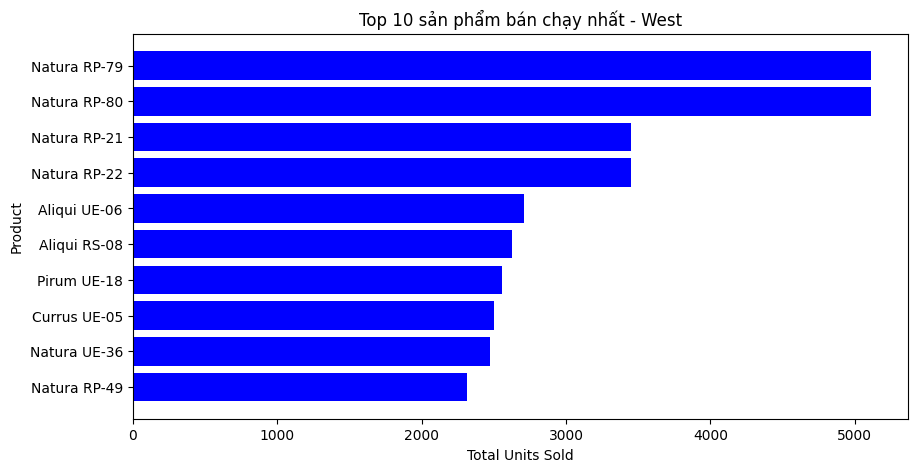

In [33]:
# Nhóm dữ liệu theo Region và Product, tính tổng số lượng bán ra
region_product_sales = df.groupby(["Region", "Product"])["Units"].sum().reset_index()

# Lấy Top 10 sản phẩm bán chạy nhất trong từng vùng, nó là bảng trên nhưng chỉ lấy 10 hàng có Units lớn nhất
top_products_per_region = region_product_sales.groupby("Region").apply(lambda x: x.nlargest(10, "Units")).reset_index(drop=True)
# phải có reset_index(drop=True) để reset lại index và không giữ index cũ, nếu không thì Region sẽ thành index và không thể groupby được

# Vẽ 3 biểu đồ riêng biệt cho từng vùng
regions = top_products_per_region["Region"].unique() # Lấy danh sách các vùng không trùng lặp

# vẽ biểu đồ cho từng vùng
for region in regions:
    plt.figure(figsize=(10, 5))
    region_data = top_products_per_region[top_products_per_region["Region"] == region]
    plt.barh(region_data["Product"], region_data["Units"], color='blue')
    plt.xlabel("Total Units Sold")
    plt.ylabel("Product")
    plt.title(f"Top 10 sản phẩm bán chạy nhất - {region}")
    plt.gca().invert_yaxis()  # Đảo ngược trục để sản phẩm bán chạy nhất lên trên
    plt.show()

## 5. Phân tích Category và 